# Leitura dos dados

In [1]:
!pip install pandas
!pip install --force-reinstall pytz
import pandas as pd
import numpy as np


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2024.2
    Uninstalling pytz-2024.2:
      Successfully uninstalled pytz-2024.2


In [2]:
data = pd.read_csv('../data/soy/13/soy_prices.csv')
data.head()

,id,product_id,main_location_id,date,avg_price,ask,bid,created_at,main_location,updated_at
0,1,2,13,2021-06-01,98.260000,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
1,16,2,13,2021-06-28,86.791109,NaN,NaN,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2,110,2,13,2021-06-21,88.678023,NaN,NaN,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
3,127,2,13,2021-06-16,92.501266,97.651859,85.078293,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
4,135,2,13,2021-06-29,86.988890,92.104972,84.394537,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


In [3]:
data.shape

(745, 10)

In [4]:
df = data.copy()

In [5]:
df.head()

,id,product_id,main_location_id,date,avg_price,ask,bid,created_at,main_location,updated_at
0,1,2,13,2021-06-01,98.260000,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
1,16,2,13,2021-06-28,86.791109,NaN,NaN,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2,110,2,13,2021-06-21,88.678023,NaN,NaN,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
3,127,2,13,2021-06-16,92.501266,97.651859,85.078293,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
4,135,2,13,2021-06-29,86.988890,92.104972,84.394537,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


In [6]:
df.sort_values(by='date', inplace=True)
df = df.iloc[:-3]
df.tail()

,id,product_id,main_location_id,date,avg_price,ask,bid,created_at,main_location,updated_at
737,67613,2,13,2024-04-08,56.782795,57.494348,55.071242,2024-04-08 20:27:15,NaN,2024-04-09 14:56:59
738,67664,2,13,2024-04-09,55.983425,56.774609,54.192241,2024-04-09 20:26:54,NaN,2024-04-10 15:17:30
739,67715,2,13,2024-04-10,56.765685,57.184092,55.347278,2024-04-10 20:26:30,NaN,2024-04-11 13:08:41
740,67766,2,13,2024-04-11,56.141202,57.459138,55.823267,2024-04-11 20:27:47,NaN,2024-04-12 12:48:17
741,67817,2,13,2024-04-12,57.652010,58.777645,56.526375,2024-04-12 20:27:05,NaN,2024-04-15 12:59:55


In [7]:
df = df.groupby(['product_id', 'main_location_id', 'date']).agg({
    'id': 'last',
    'avg_price': 'mean',  # Média de avg_price
    'ask': lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan,  # Primeiro valor não nulo para ask
    'bid': lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan,  # Primeiro valor não nulo para bid
    'created_at': 'first',  # Primeiro valor de created_at
    'main_location': 'first',  # Primeiro valor de main_location
    'updated_at': 'first'  # Primeiro valor de updated_at
}).reset_index()
df['ask'] = df['ask'].interpolate(method='polynomial', order=2, limit_direction='both')
df['bid'] = df['bid'].interpolate(method='polynomial', order=2, limit_direction='both')
df['ask'] = df['ask'].fillna(method='bfill')
df['bid'] = df['bid'].fillna(method='bfill')
df.head()

C:\Users\gui_h\AppData\Local\Temp\ipykernel_10476\2217700577.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ask'] = df['ask'].fillna(method='bfill')
C:\Users\gui_h\AppData\Local\Temp\ipykernel_10476\2217700577.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['bid'] = df['bid'].fillna(method='bfill')


,product_id,main_location_id,date,id,avg_price,ask,bid,created_at,main_location,updated_at
0,2,13,2021-05-31,1267,100.582839,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
1,2,13,2021-06-01,1,98.260000,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2,2,13,2021-06-02,367,97.962223,104.538052,95.055231,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
3,2,13,2021-06-04,1242,98.019999,103.732872,94.953842,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
4,2,13,2021-06-07,425,97.593333,100.561709,95.757563,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


In [8]:
df.shape

(733, 10)

In [9]:
df.index = df['date']
df.head()

,product_id,main_location_id,date,id,avg_price,ask,bid,created_at,main_location,updated_at
date,,,,,,,,,,
2021-05-31,2,13,2021-05-31,1267,100.582839,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-01,2,13,2021-06-01,1,98.260000,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-02,2,13,2021-06-02,367,97.962223,104.538052,95.055231,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-04,2,13,2021-06-04,1242,98.019999,103.732872,94.953842,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-07,2,13,2021-06-07,425,97.593333,100.561709,95.757563,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


In [10]:
df.drop('date', axis=1, inplace=True)
df.head()

,product_id,main_location_id,id,avg_price,ask,bid,created_at,main_location,updated_at
date,,,,,,,,,
2021-05-31,2,13,1267,100.582839,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-01,2,13,1,98.260000,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-02,2,13,367,97.962223,104.538052,95.055231,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-04,2,13,1242,98.019999,103.732872,94.953842,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-07,2,13,425,97.593333,100.561709,95.757563,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


# Análise descritiva da série temporal

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
descriptive_stats = df[["avg_price", "ask", "bid"]].describe()
descriptive_stats

,avg_price,ask,bid
count,733.000000,733.000000,733.000000
mean,77.085638,78.381719,75.979753
std,16.162238,16.669892,15.844442
min,47.529832,47.712849,46.746814
25%,57.905428,58.807497,57.346759
50%,82.789998,83.977033,81.873921
75%,88.480199,90.269420,87.733456
max,102.367779,105.316259,100.909936


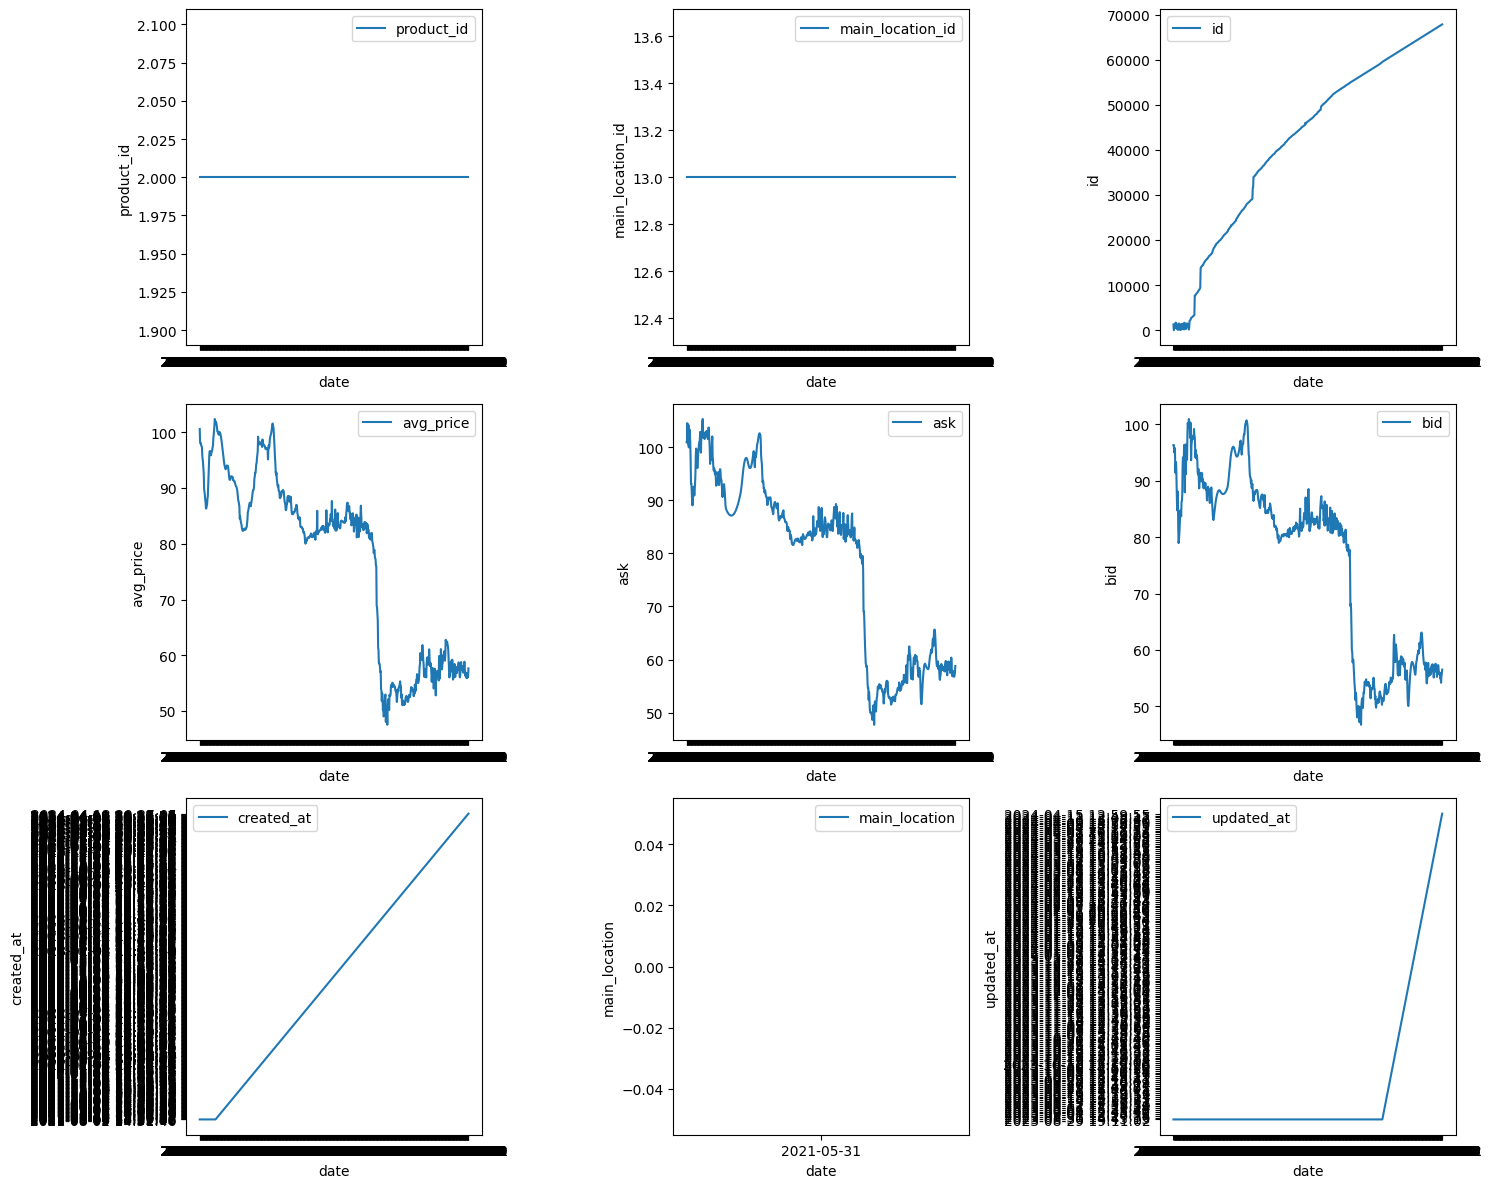

In [13]:
import math

num_columns = len(df.columns)

cols = 3  
rows = math.ceil(num_columns / cols)  

plt.figure(figsize=(cols * 5, rows * 4))

for i, column in enumerate(df.columns, 1):
    plt.subplot(rows, cols, i)
    plt.plot(df[column], label=column)
    plt.xlabel('date')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

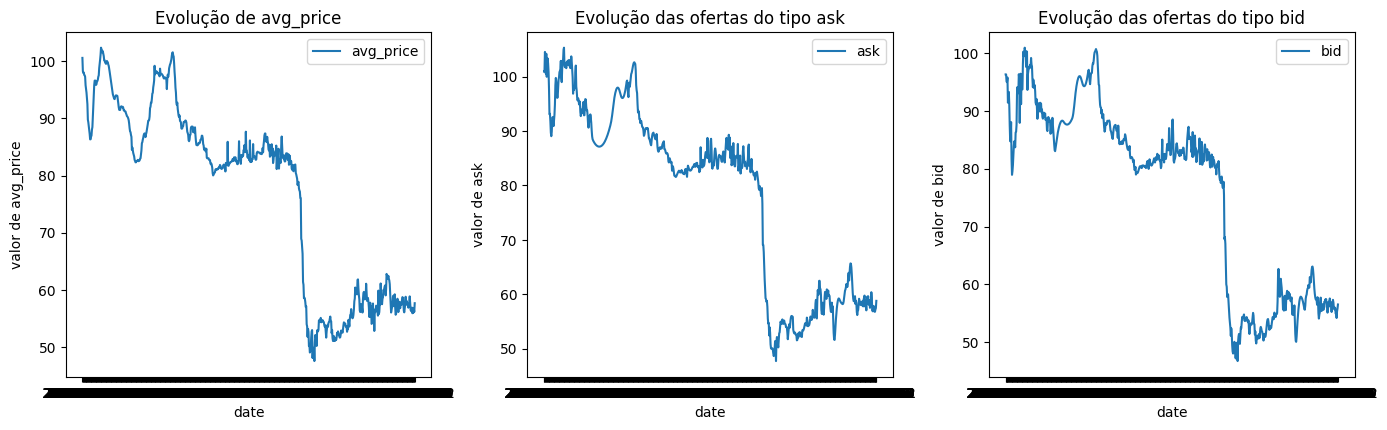

In [14]:
# Séries temporais de avg_price, ask e bid
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.plot(df['avg_price'], label='avg_price')
plt.title('Evolução de avg_price')
plt.xlabel('date')
plt.ylabel('valor de avg_price')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(df['ask'], label='ask')
plt.title('Evolução das ofertas do tipo ask')
plt.xlabel('date')
plt.ylabel('valor de ask')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(df['bid'], label='bid')
plt.title('Evolução das ofertas do tipo bid')
plt.xlabel('date')
plt.ylabel('valor de bid')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
selected_columns = ['avg_price', 'ask', 'bid']
correlation_matrix = df[selected_columns].corr()
correlation_matrix

,avg_price,ask,bid
avg_price,1.000000,0.996340,0.994392
ask,0.996340,1.000000,0.992764
bid,0.994392,0.992764,1.000000


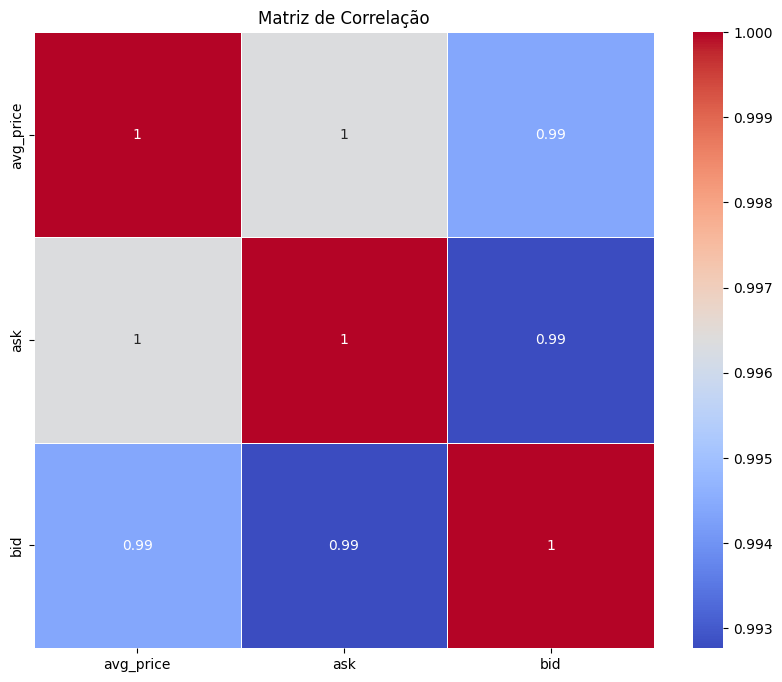

In [16]:


# Matrix de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

# Análisis de Estacionariedad

In [17]:
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller, kpss


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# Augmented Dickey-Fuller Test (ADF) e Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
def stationarity_tests(timeseries, series_name):
    print(f"Resultados para test ADF {series_name}:")
    adf_test = adfuller(timeseries)
    print(f"ADF Statistic: {adf_test[0]}")
    print(f"p-value: {adf_test[1]}")
    for key, value in adf_test[4].items():
        print(f'Critical Value ({key}): {value}')
    print()



In [19]:
df.columns

Index(['product_id', 'main_location_id', 'id', 'avg_price', 'ask', 'bid',
       'created_at', 'main_location', 'updated_at'],
      dtype='object')

In [20]:
relevant_columns = ['avg_price']

df_interpolated = df[relevant_columns].copy()

for serie in relevant_columns:
    print(f"Analisando a série: {serie}")
    # Verifica se a série é constante
    if df_interpolated[serie].nunique() > 1:  # Garante que haja variabilidade na série
        stationarity_tests(df_interpolated[serie], serie)
    else:
        print(f"A série {serie} é constante e foi ignorada.")


Analisando a série: avg_price
Resultados para test ADF avg_price:
ADF Statistic: -1.0991233056719667
p-value: 0.7154213940728572
Critical Value (1%): -3.439376877165393
Critical Value (5%): -2.865523768488869
Critical Value (10%): -2.5688914082860164



# Transformação de séries não estacionárias


In [21]:
# Função para aplicar diferenciação e testar estacionariedade
def difference_and_test_stationarity(series, series_name, diff_order=1):
    differenced_series = series.diff(diff_order).dropna()

    # ADF test na série diferenciada
    adf_result = adfuller(differenced_series)
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    critical_values = adf_result[4]

    print(f'ADF result para série diferenciada {series_name}:')
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    for key, value in critical_values.items():
        print(f'Critical Value ({key}): {value}\n')

    return differenced_series



In [22]:
# transformando e verificando estacionariedade da série temporal
transformed_series = {}
key_columns = ['avg_price', 'ask', 'bid']
for series_name in key_columns:
    print(f'Transformando a série: {series_name}')
    transformed_series[series_name] = difference_and_test_stationarity(df[series_name], series_name)

Transformando a série: avg_price
ADF result para série diferenciada avg_price:
ADF Statistic: -9.6327844675905
p-value: 1.5956613882998392e-16
Critical Value (1%): -3.439376877165393

Critical Value (5%): -2.865523768488869

Critical Value (10%): -2.5688914082860164

Transformando a série: ask
ADF result para série diferenciada ask:
ADF Statistic: -5.7469986866424225
p-value: 6.08878787702789e-07
Critical Value (1%): -3.4395289262948894

Critical Value (5%): -2.8655907692307694

Critical Value (10%): -2.5689271030368235

Transformando a série: bid
ADF result para série diferenciada bid:
ADF Statistic: -5.917732591620137
p-value: 2.549194354513944e-07
Critical Value (1%): -3.4395677423210493

Critical Value (5%): -2.8656078730509784

Critical Value (10%): -2.5689362152032573



In [23]:
# df estacionário
transformed_series.keys()

dict_keys(['avg_price', 'ask', 'bid'])

In [24]:
df_estacionarias = pd.DataFrame(transformed_series)
df_estacionarias

,avg_price,ask,bid
date,,,
2021-06-01,-2.322839,0.000000,0.000000
2021-06-02,-0.297777,3.608038,-1.239694
2021-06-04,0.057777,-0.805180,-0.101389
2021-06-07,-0.426666,-3.171163,0.803722
2021-06-08,-0.066666,3.639877,-4.345707
...,...,...,...
2024-04-08,0.884655,0.633425,0.135885
2024-04-09,-0.799370,-0.719740,-0.879000
2024-04-10,0.782260,0.409483,1.155037


# Decomposição da série (tendencia, Sazonalidade e ruído)

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Função para decompor e plotar as séries temporais
def decompose_series(series, series_name, model='additive', freq=365):
    decomposition = seasonal_decompose(series, model=model, period=freq)

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
    decomposition.observed.plot(ax=ax1)
    ax1.set_ylabel('Observada')
    ax1.set_title(f'Decomposição da série {series_name}')

    decomposition.trend.plot(ax=ax2)
    ax2.set_ylabel('Tendencia')

    decomposition.seasonal.plot(ax=ax3)
    ax3.set_ylabel('Sazonalidade')

    decomposition.resid.plot(ax=ax4)
    ax4.set_ylabel('Residual')

    plt.tight_layout()
    plt.show()

    return decomposition

Deconposição ADITIVA: avg_price


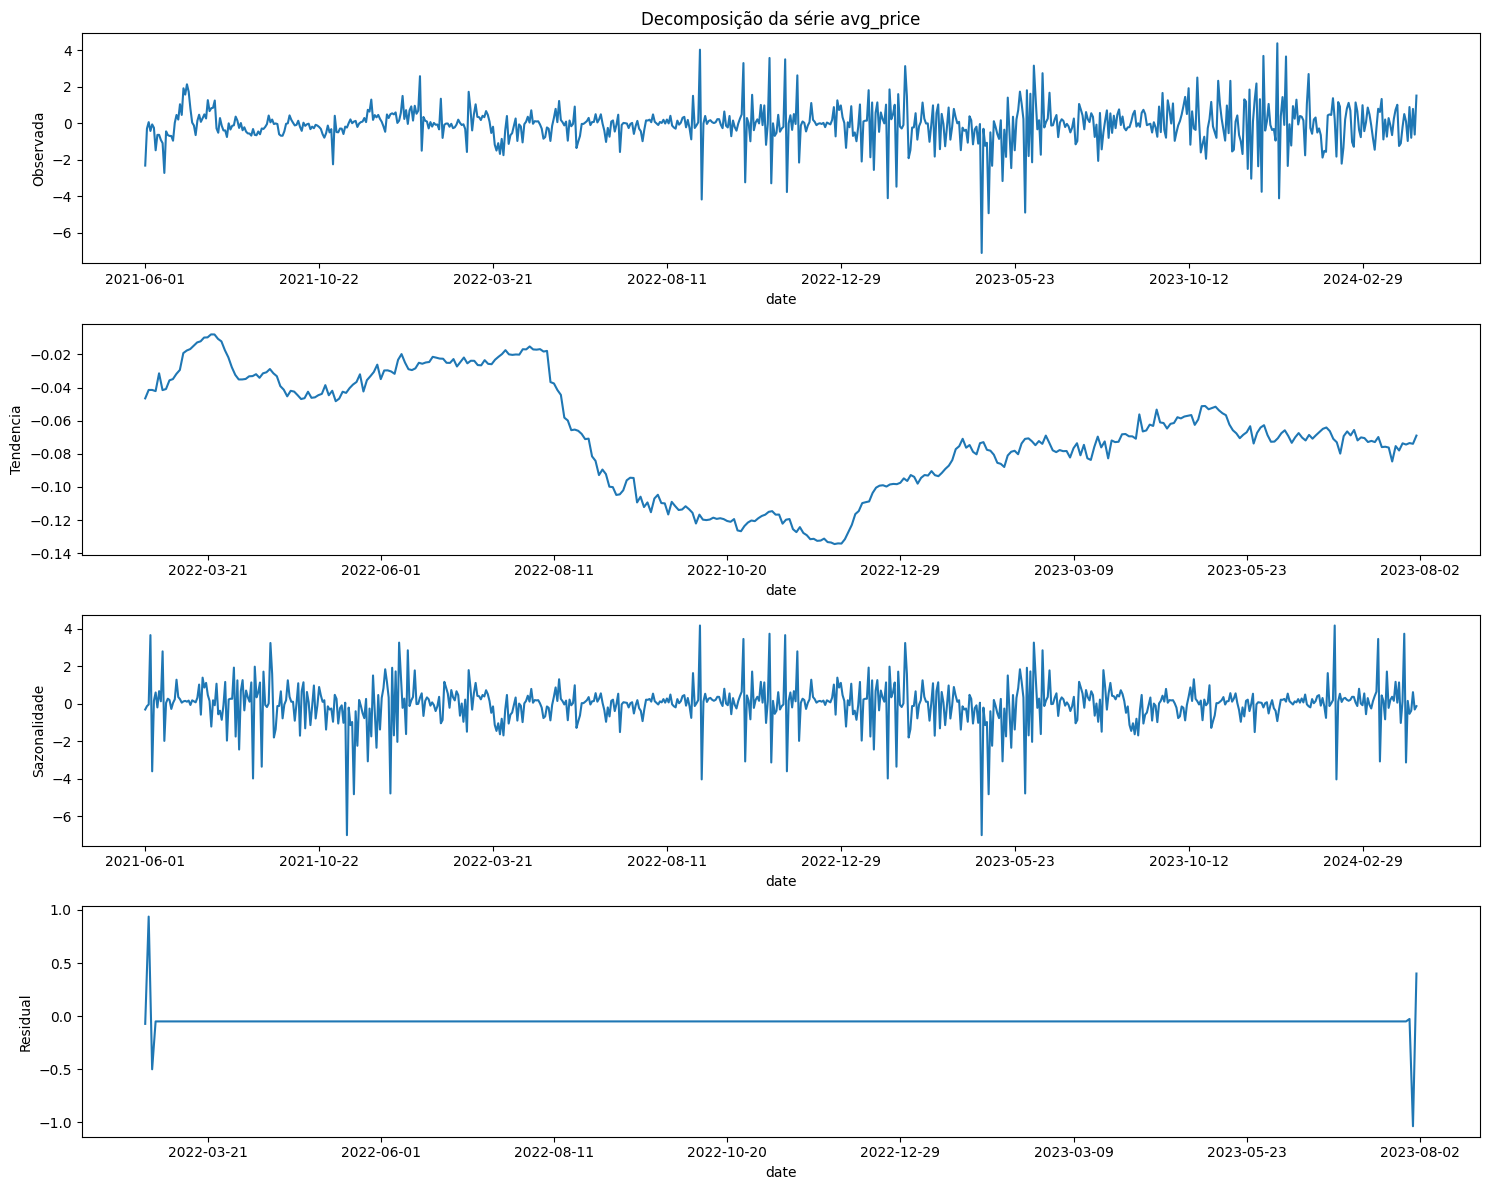

Deconposição ADITIVA: ask


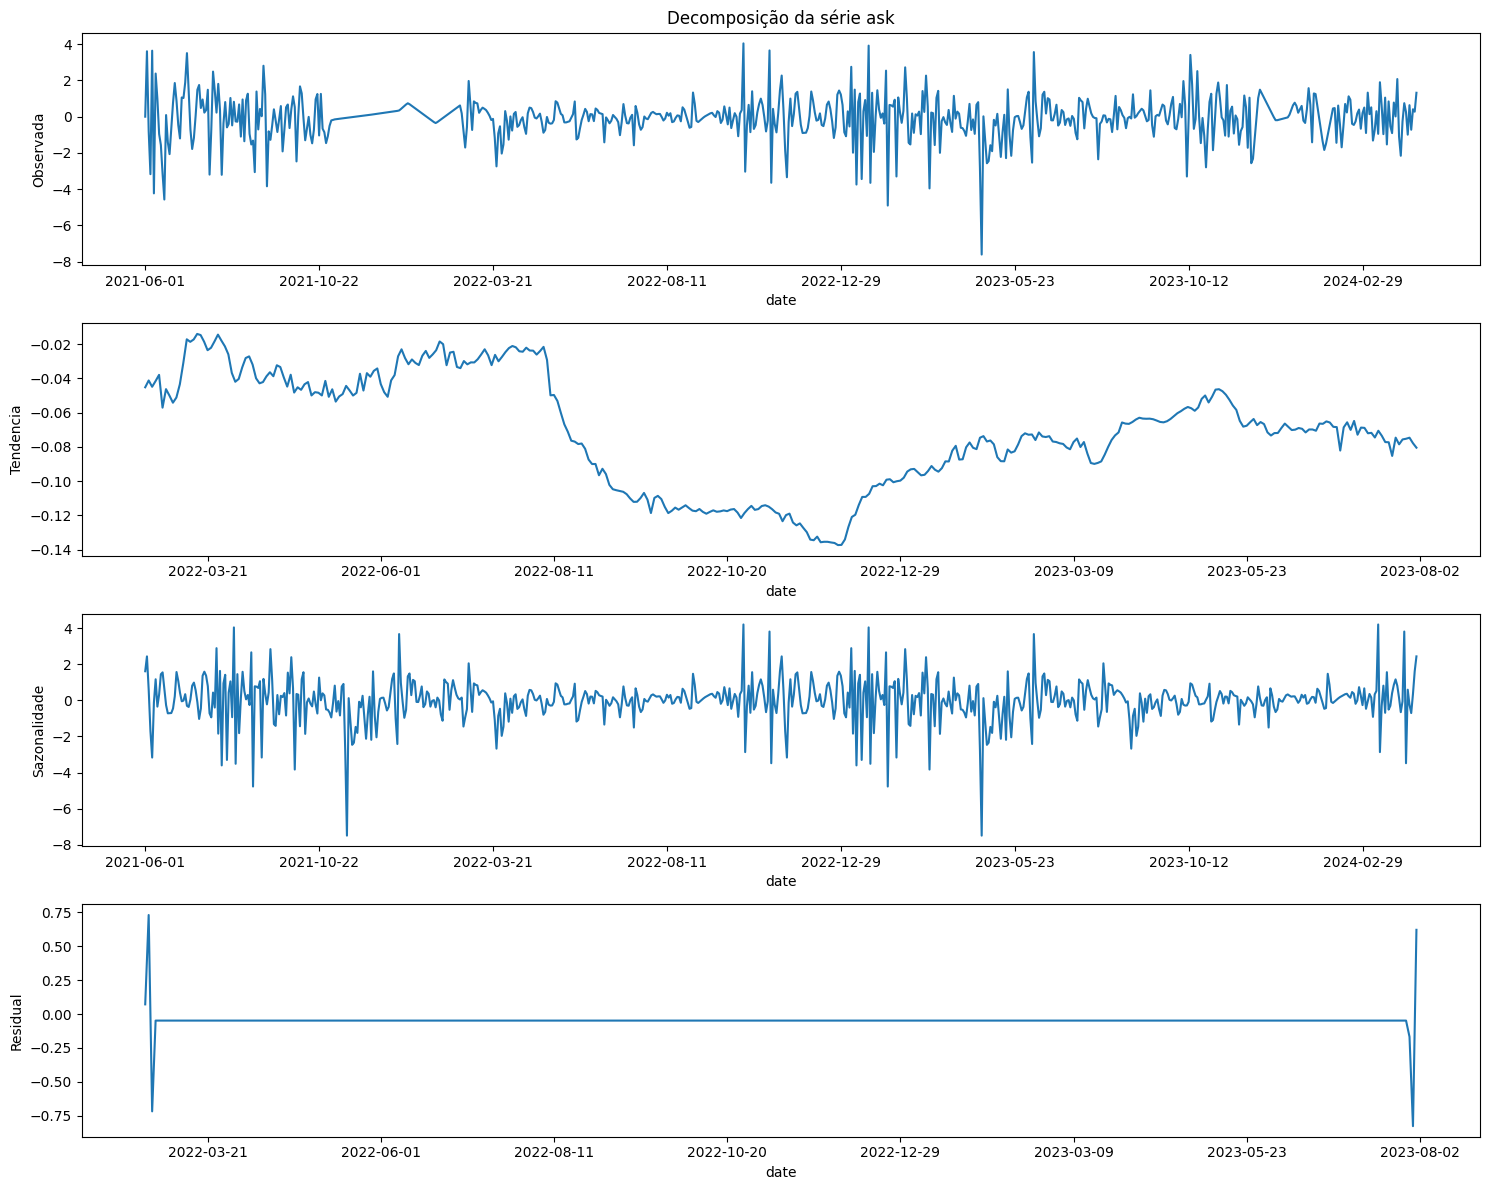

Deconposição ADITIVA: bid


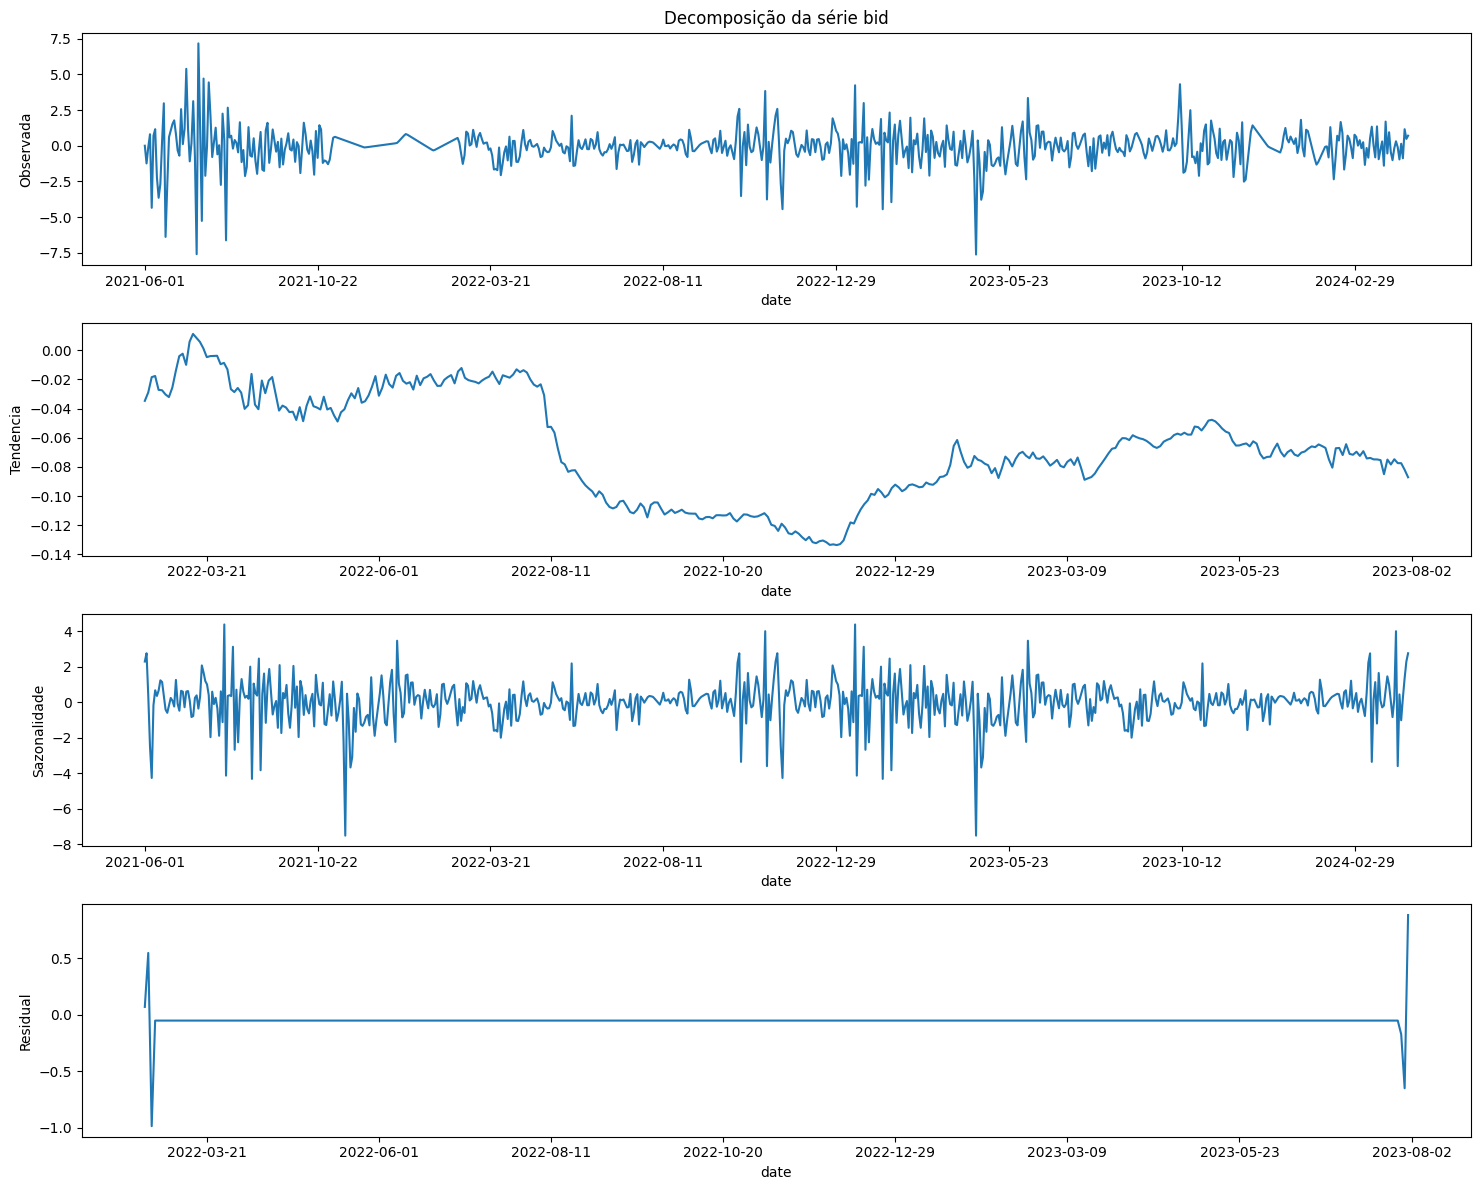

In [26]:
# Aplicando a função de decomposição da série

decompositions = {}
for series_name in df_estacionarias.columns:
    print(f'Deconposição ADITIVA: {series_name}')
    decompositions[series_name] = decompose_series(df_estacionarias[series_name], series_name)


Deconposição MULTIPLICATIVA: avg_price


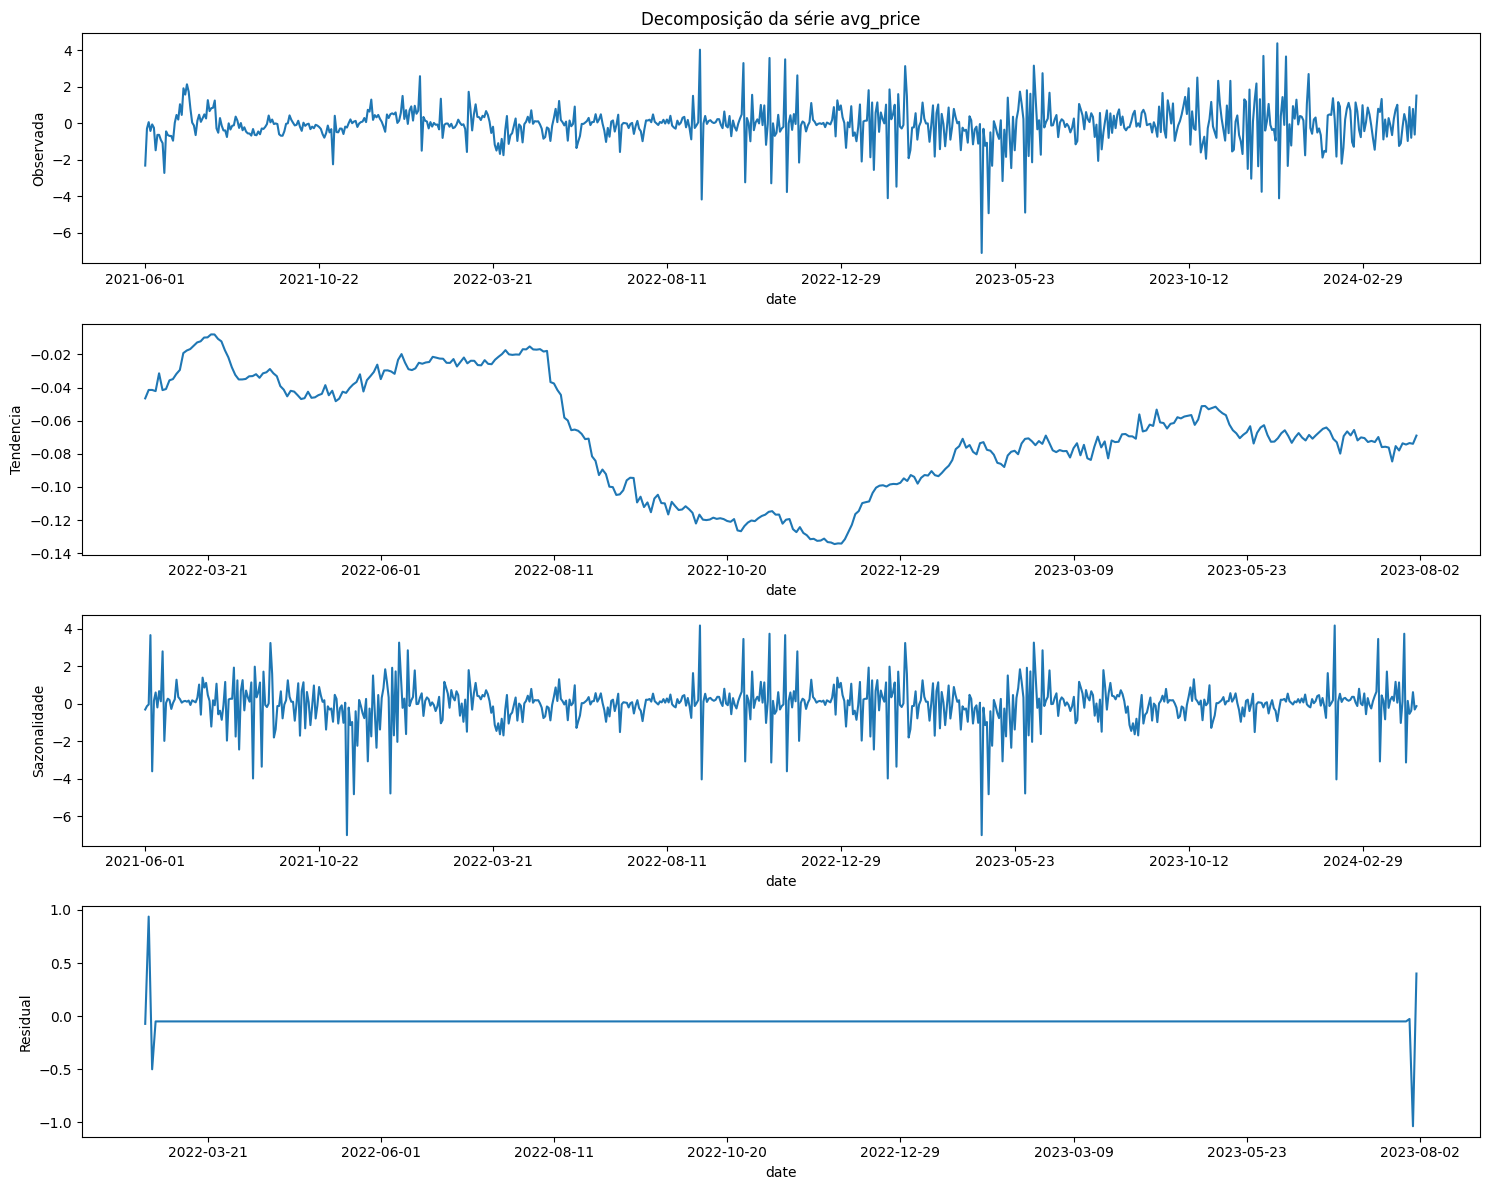

Deconposição MULTIPLICATIVA: ask


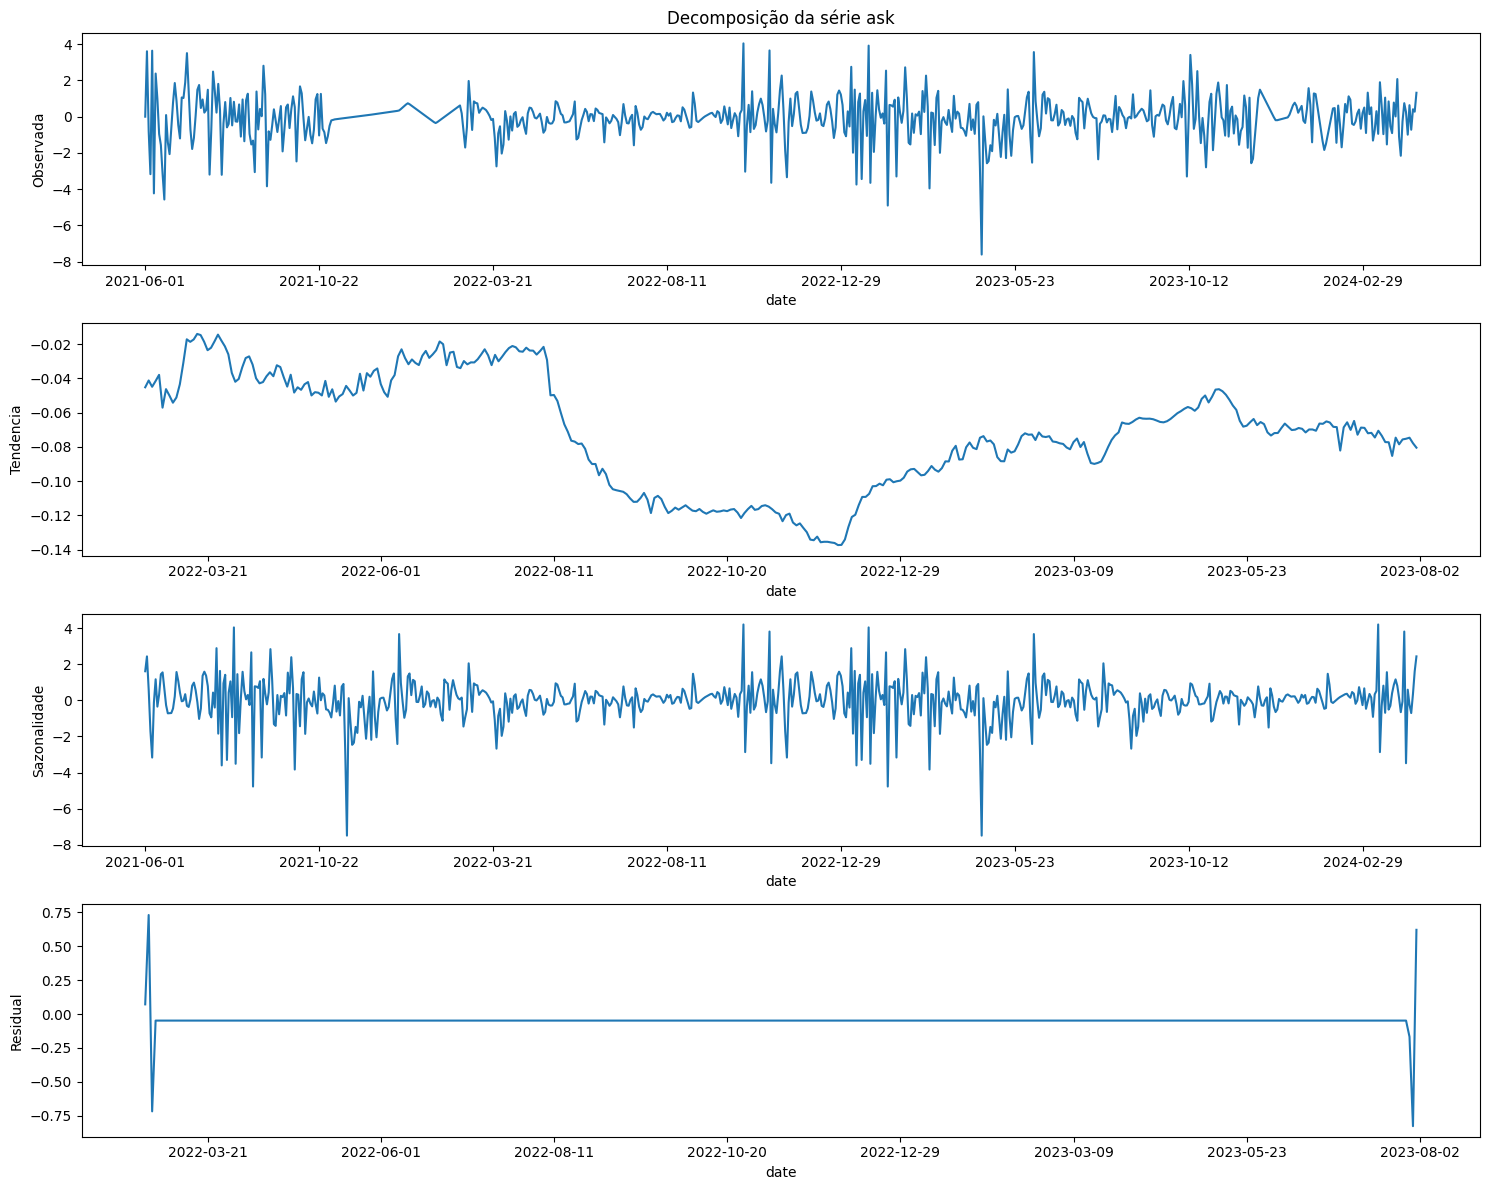

Deconposição MULTIPLICATIVA: bid


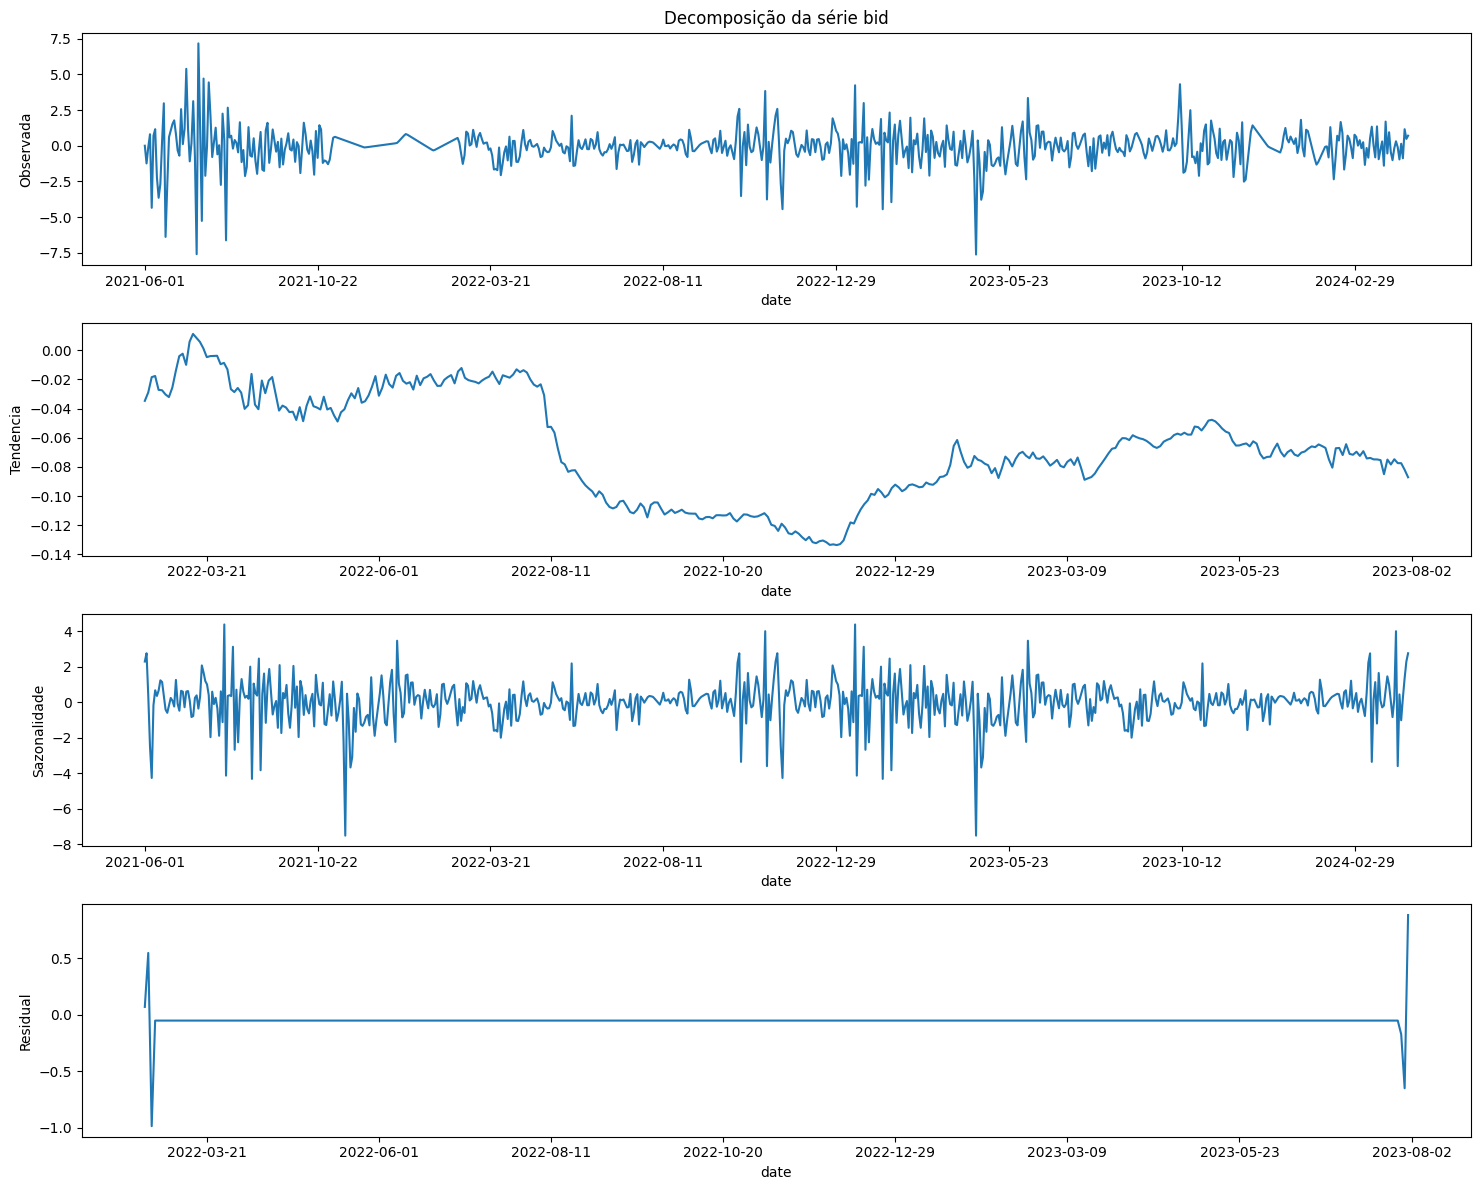

In [27]:
# Aplicando a função de decomposição da série

decompositions = {}
for series_name in df_estacionarias.columns:
    print(f'Deconposição MULTIPLICATIVA: {series_name}')
    decompositions[series_name] = decompose_series(df_estacionarias[series_name], series_name)


# Análise de Autocorrelação e Autocorrelação parcial

In [28]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Análise: avg_price


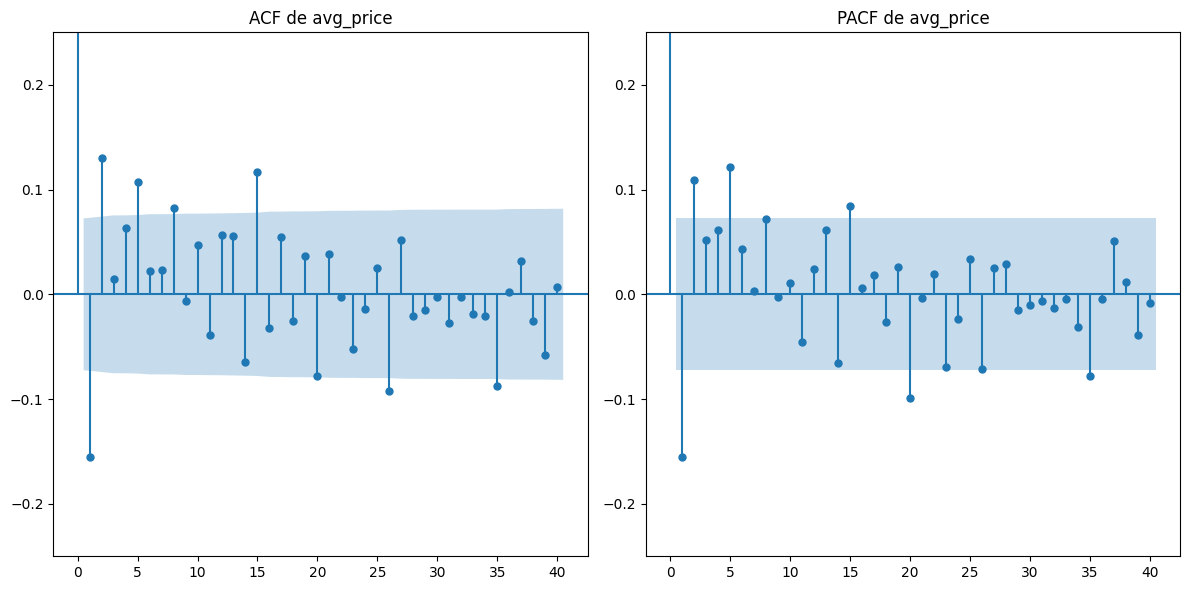

Análise: ask


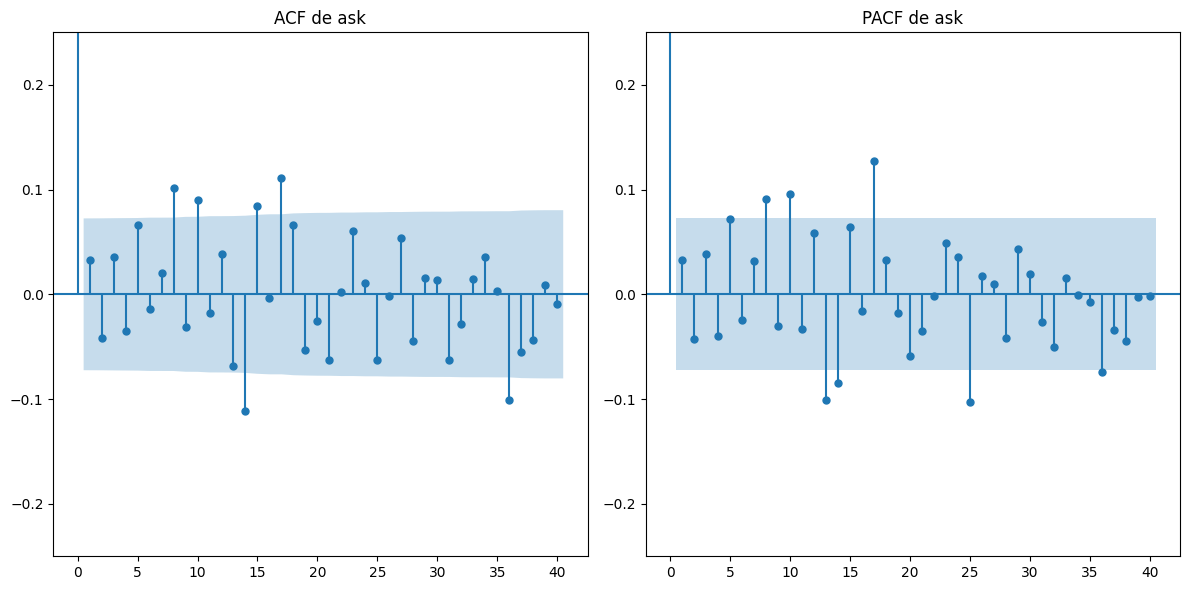

Análise: bid


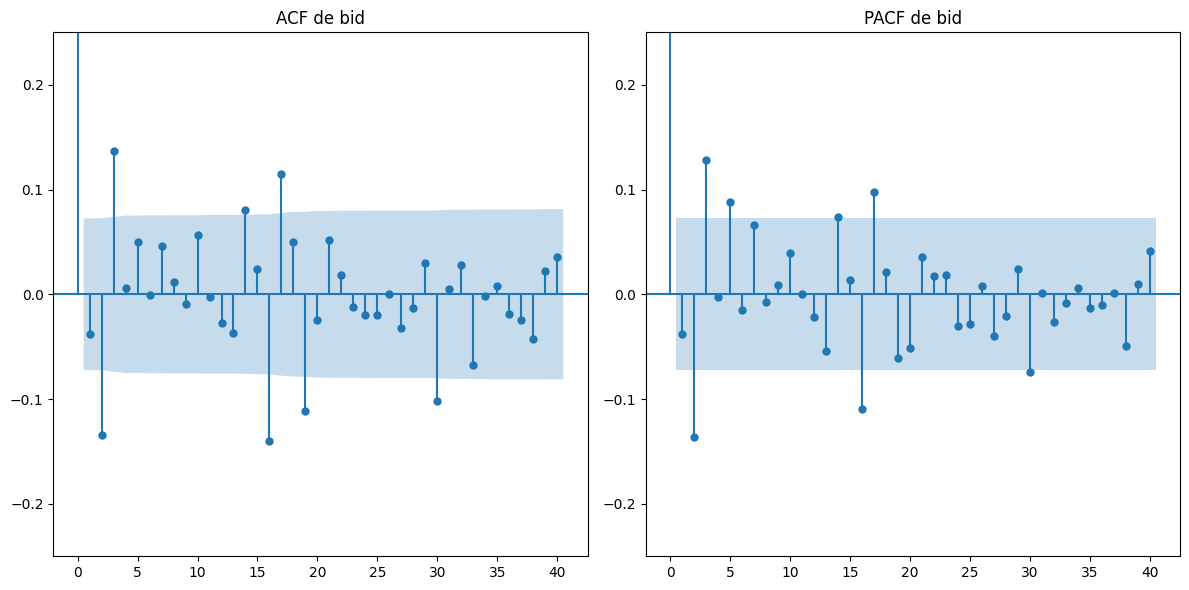

In [29]:
series_to_analyze = df_estacionarias.columns

# ACF e PACF function
def plot_acf_pacf(series, series_name, lags=40):
    plt.figure(figsize=(12, 6))

    # Gráfico de ACF
    plt.subplot(121)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.ylim(-0.25, 0.25)
    plt.title(f'ACF de {series_name}')

    # Gráfico de PACF
    plt.subplot(122)
    plot_pacf(series, lags=lags, ax=plt.gca(), method='ywm')
    plt.ylim(-0.25, 0.25)
    plt.title(f'PACF de {series_name}')


    plt.tight_layout()
    plt.show()

# ACF e PACF para série diferenciada
for series_name in series_to_analyze:
    print(f'Análise: {series_name}')
    series = df_estacionarias[series_name]
    plot_acf_pacf(series, series_name)

# Modelado ARIMA

In [30]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [31]:
df_estacionarias.head()

,avg_price,ask,bid
date,,,
2021-06-01,-2.322839,0.000000,0.000000
2021-06-02,-0.297777,3.608038,-1.239694
2021-06-04,0.057777,-0.805180,-0.101389
2021-06-07,-0.426666,-3.171163,0.803722
2021-06-08,-0.066666,3.639877,-4.345707


## ARIMA

In [32]:
df_avg_price_diff = df_estacionarias['avg_price']

# Identificador de possíveis valores de p e q
p_values = range(0, 4)
q_values = range(0, 4)

# obter melhores valores de p, d, q utilizando AIC
best_aic = np.inf
best_order = None
best_mdl = None

for p in p_values:
    for q in q_values:
        try:
            tmp_mdl = ARIMA(df_avg_price_diff, order=(p, 0, q)).fit()
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (p, 0, q)
                best_mdl = tmp_mdl
        except Exception as e:
            print(f'ARIMA{p} falhou com erro: {e}')
            continue

print(f'O melhor modelo de arima é: ARIMA{best_order} con AIC={best_aic}')
print(best_mdl.summary())


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been pro

O melhor modelo de arima é: ARIMA(2, 0, 1) con AIC=2120.849981901209
                               SARIMAX Results                                
Dep. Variable:              avg_price   No. Observations:                  732
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1055.425
Date:                Sun, 03 Nov 2024   AIC                           2120.850
Time:                        21:13:39   BIC                           2143.829
Sample:                             0   HQIC                          2129.714
                                - 732                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0612      0.059     -1.044      0.296      -0.176       0.054
ar.L1          0.6382      0.065      9.782      0.000       0

In [33]:
print(best_order)

(2, 0, 1)


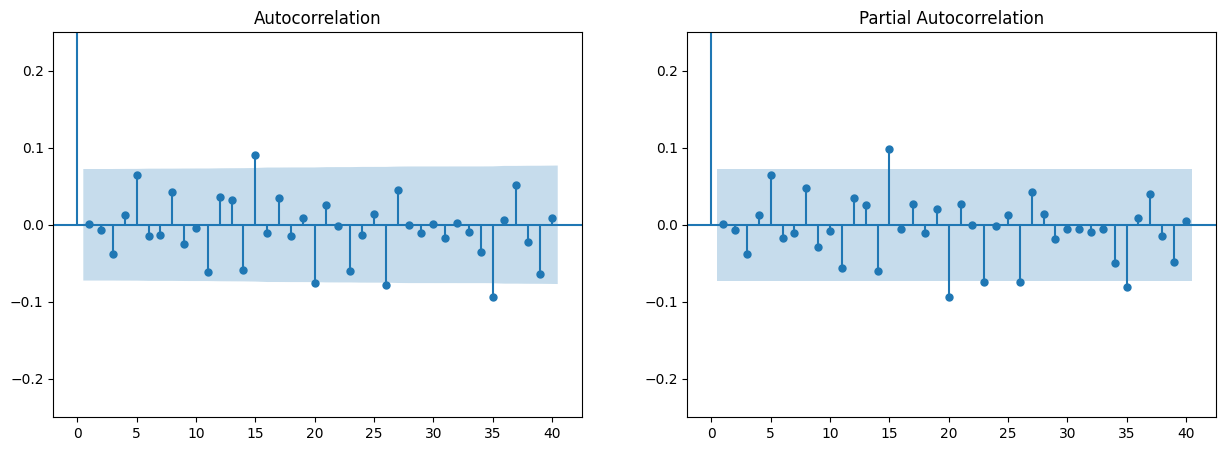

In [34]:
# Diagnóstico de residuos
residuals = best_mdl.resid
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
ax[0].set_ylim(-0.25, 0.25) 
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
ax[1].set_ylim(-0.25, 0.25)  
plt.show()

## Autoarima

In [35]:
!pip install pmdarima


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from pmdarima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2121.990, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2155.495, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2140.353, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2143.883, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2121.444, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2132.939, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2137.008, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2122.788, Time=0.26 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2134.720, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2120.013, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2132.961, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2122.000, Time=0.47 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2132.762, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2123.902, Time=0.79 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept

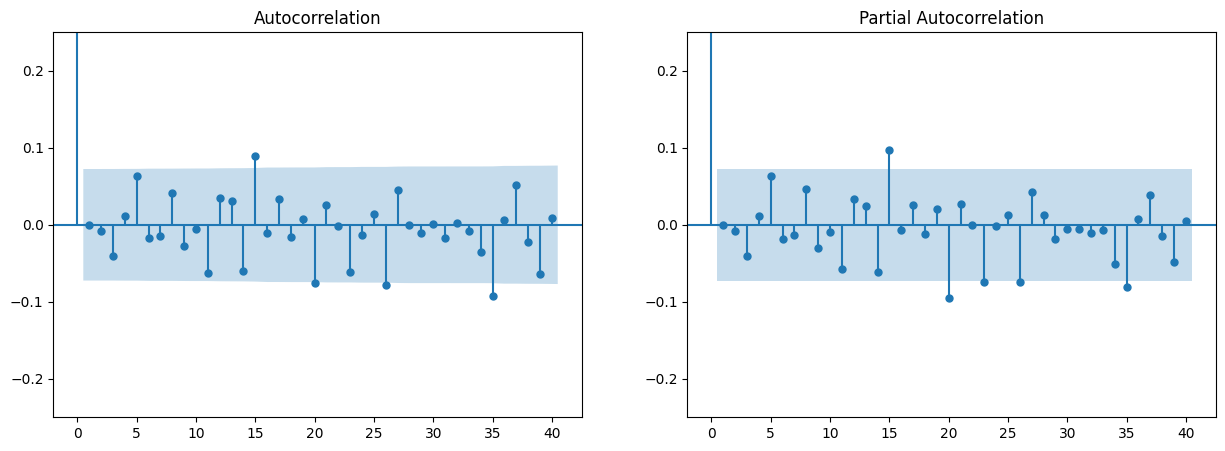

In [37]:
# Selecionar avg_price por diferenciação
df_avg_price_diff = df_estacionarias['avg_price']

# Aplicar AUTOARIMA
model = auto_arima(df_avg_price_diff, seasonal=False, stepwise=True, trace=True)

# resumo do modelo selecionado
print(model.summary())

# Diagnóstico de residuos
residuals = model.resid()
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
ax[0].set_ylim(-0.25, 0.25)  # limites de y
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
ax[1].set_ylim(-0.25, 0.25)  #limites de y
plt.show()

# Modelo ARIMA

In [38]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [39]:
# df serie orginal
df.head()

,product_id,main_location_id,id,avg_price,ask,bid,created_at,main_location,updated_at
date,,,,,,,,,
2021-05-31,2,13,1267,100.582839,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-01,2,13,1,98.260000,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-02,2,13,367,97.962223,104.538052,95.055231,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-04,2,13,1242,98.019999,103.732872,94.953842,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-07,2,13,425,97.593333,100.561709,95.757563,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


In [40]:
df_avg_price_diff = df_estacionarias['avg_price']

# Divisão treinamento e teste
train_size = int(len(df_avg_price_diff) * 0.7) # utilizando 70% dos dados para treinamento e 30% para teste
train, test = df_avg_price_diff[:train_size], df_avg_price_diff[train_size:]

model = ARIMA(train, order=best_order) # tupla com os melhores valores (2, 0, 1)
model_fit = model.fit()

# Predição no conjunto de prova
start = len(train)
end = len(train) + len(test) - 1
predictions_diff = model_fit.predict(start=start, end=end, dynamic=True)

# série original
df_avg_price_original = df['avg_price']

# Série vazia para previsões invertidas
predictions = pd.Series(index=test.index, dtype=float)

# Reverter a diferenciação  utilizando os valores da serie original
for i in range(len(predictions_diff)):
    if i == 0:
        predictions.iloc[i] = df_avg_price_original.iloc[train_size] + predictions_diff.iloc[i]
    else:
        predictions.iloc[i] = predictions.iloc[i - 1] + predictions_diff.iloc[i]

c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

In [41]:
# MSE teste
mse = mean_squared_error(df_avg_price_original[test.index], predictions)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 336.46617205084726


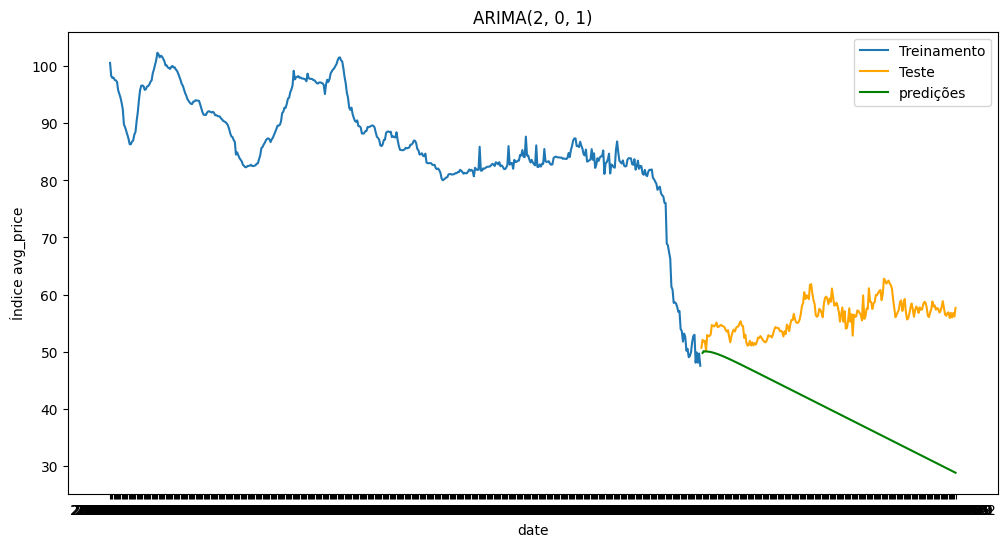

In [42]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_avg_price_original.index[:train_size], df_avg_price_original[:train_size], label='Treinamento')
plt.plot(df_avg_price_original.index[train_size:], df_avg_price_original[train_size:], label='Teste', color='orange')
plt.plot(predictions.index, predictions, label='predições', color='green')
plt.xlabel('date')
plt.ylabel('Índice avg_price')
plt.title(f'ARIMA{best_order}')
plt.legend()
plt.show()

## SARIMAX

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import combinations

In [44]:
df_estacionarias.columns

Index(['avg_price', 'ask', 'bid'], dtype='object')

In [45]:
df.columns

Index(['product_id', 'main_location_id', 'id', 'avg_price', 'ask', 'bid',
       'created_at', 'main_location', 'updated_at'],
      dtype='object')

In [46]:
# df de avg_price diferenciada
df_avg_price_diff = df_estacionarias['avg_price']

# variáveis exógenas
exogenous_vars = ['ask','bid']

# dados de teste e treinamento
train_size = int(len(df_avg_price_diff) * 0.7)
train_diff, test_diff = df_avg_price_diff[:train_size], df_avg_price_diff[train_size:]
train_exog, test_exog = df_estacionarias[exogenous_vars][:train_size], df_estacionarias[exogenous_vars][train_size:]

combinations_of_vars = [combo for combo in combinations(exogenous_vars, 2)]
print("Minhas variáveis exógenas:", combinations_of_vars) # tem apenas uma combinação
best_aic = np.inf
# best_order = None
best_model = None
best_vars = None
for combo in combinations_of_vars:
    try:
        print("Entrou aqui?", combo)
        model = SARIMAX(endog=train_diff, order=best_order, exog=train_exog)
        print("1")
        model_fit = model.fit(disp=False)
        aic = model_fit.aic
        print("AIC:", aic)  
        if aic < best_aic:
            best_aic = aic
            best_order = best_order #Usando o best order observado anteriormente (2, 0, 1)
            best_model = model_fit
            best_vars = combo
    except Exception as e:
        print(f'Erro: {e}')
        continue

print(f'O melhor modelo SARIMAX encontrado é: SARIMAX{best_order} com AIC={best_aic} e variáveis exógenas: {best_vars}')
print(best_model.summary())

Minhas variáveis exógenas: [('ask', 'bid')]
Entrou aqui? ('ask', 'bid')
1


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting 

AIC: 1170.9104107409223
O melhor modelo SARIMAX encontrado é: SARIMAX(2, 0, 1) com AIC=1170.9104107409223 e variáveis exógenas: ('ask', 'bid')
                               SARIMAX Results                                
Dep. Variable:              avg_price   No. Observations:                  512
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -579.455
Date:                Sun, 03 Nov 2024   AIC                           1170.910
Time:                        21:13:49   BIC                           1196.340
Sample:                             0   HQIC                          1180.879
                                - 512                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ask            0.3900      0.025     15.516      0.000       0.341 

In [47]:
train_exog.head()

,ask,bid
date,,
2021-06-01,0.000000,0.000000
2021-06-02,3.608038,-1.239694
2021-06-04,-0.805180,-0.101389
2021-06-07,-3.171163,0.803722
2021-06-08,3.639877,-4.345707


In [48]:
train_diff.head()

date
2021-06-01   -2.322839
2021-06-02   -0.297777
2021-06-04    0.057777
2021-06-07   -0.426666
2021-06-08   -0.066666
Name: avg_price, dtype: float64

In [49]:
# Predição dataset de teste
predictions_diff = best_model.predict(start=len(train_diff), end=len(train_diff) + len(test_diff) - 1, exog=test_exog[list(best_vars)])

# retornar a diferenciação para obter as previsões no contexto original
# Criar uma série vazia para as previsões invertidas
predictions = pd.Series(index=test_diff.index, dtype=float)

# Reverter a diferenciação  utilizando os valores da serie original
for i in range(len(predictions_diff)):
    if i == 0:
        predictions.iloc[i] = df['avg_price'].iloc[train_size] + predictions_diff.iloc[i]
    else:
        predictions.iloc[i] = predictions.iloc[i - 1] + predictions_diff.iloc[i]

# MSE
mse = mean_squared_error(df['avg_price'][test_diff.index], predictions)
print(f'Mean Squared Error (MSE): {mse}')


Mean Squared Error (MSE): 6.113687753789496


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


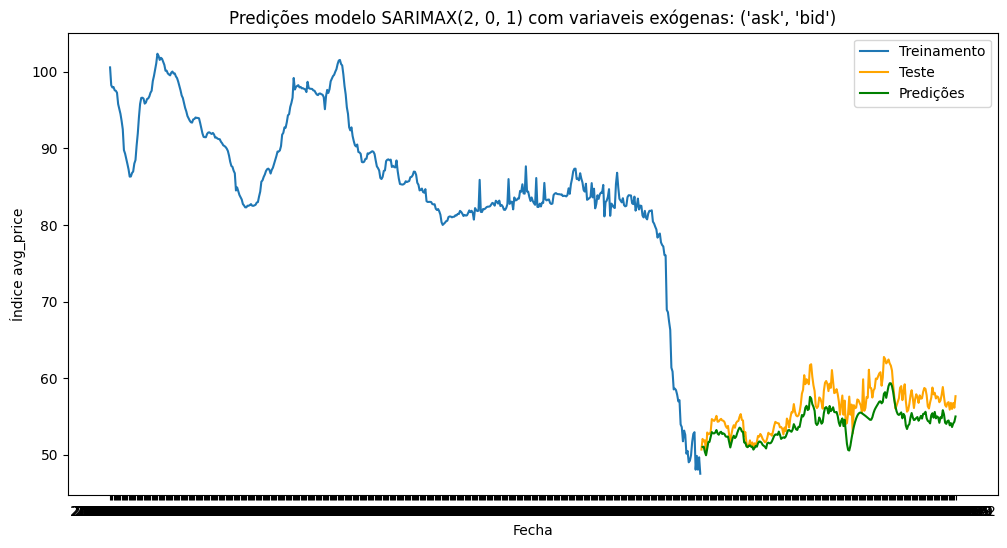

In [50]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['avg_price'].index[:train_size], df['avg_price'][:train_size], label='Treinamento')
plt.plot(df['avg_price'].index[train_size:], df['avg_price'][train_size:], label='Teste', color='orange')
plt.plot(predictions.index, predictions, label='Predições', color='green')
plt.xlabel('Fecha')
plt.ylabel('Índice avg_price')
plt.title(f'Predições modelo SARIMAX{best_order} com variaveis exógenas: {best_vars}')	
plt.legend()
plt.show()

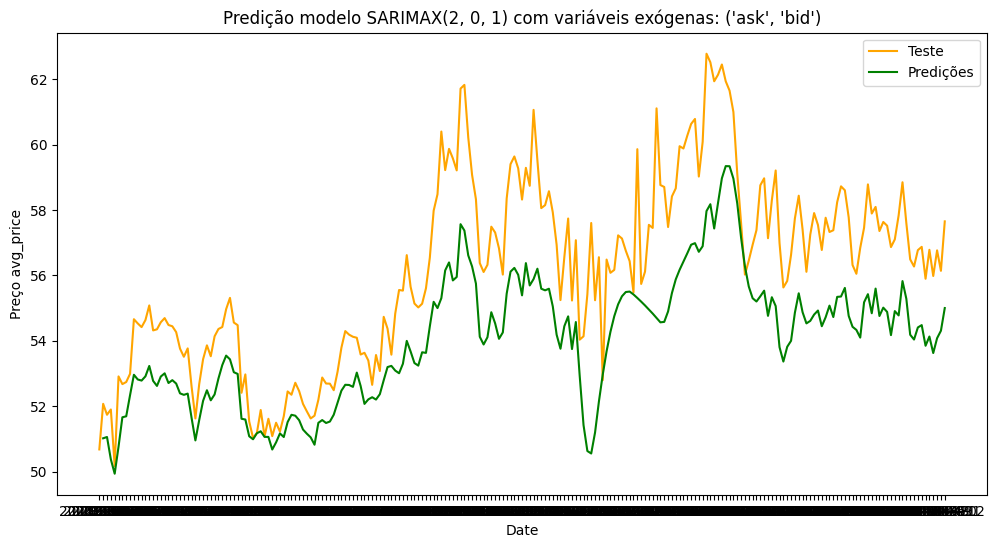

In [51]:
# Predição
# plot
plt.figure(figsize=(12, 6))
plt.plot(df['avg_price'].index[train_size:], df['avg_price'][train_size:], label='Teste', color='orange')
plt.plot(predictions.index, predictions, label='Predições', color='green')
plt.xlabel('Date')
plt.ylabel('Preço avg_price')
plt.title(f'Predição modelo SARIMAX{best_order} com variáveis exógenas: {best_vars}')
plt.legend()
plt.show()

# Fator Sazonal

In [52]:
# avg_price diferenciado por estacionariedade
df_avg_price_diff = df_estacionarias['avg_price']

# Variaveis exógenas
exogenous_vars = ['ask', 'bid']

train_size = int(len(df_avg_price_diff) * 0.7) # mesma divisão anterior de 70% para treino e 30% para teste
train_diff, test_diff = df_avg_price_diff[:train_size], df_avg_price_diff[train_size:]
train_exog, test_exog = df_estacionarias[exogenous_vars][:train_size], df_estacionarias[exogenous_vars][train_size:]

best_aic = np.inf
# best_order = None
best_seasonal_order = None
best_model = None
best_vars = None

# Parâmetro de sazonalidade
seasonal_p = range(0, 2)
seasonal_d = [0, 1]
seasonal_q = range(0, 2)
seasonal_s = [5, 7]

for sp in seasonal_p:
  for sd in seasonal_d:
    for sq in seasonal_q:
      for ss in seasonal_s:

        model = SARIMAX(train_diff, order=best_order, seasonal_order=(sp, sd, sq, ss), exog=train_exog[exogenous_vars])
        model_fit = model.fit(disp=False)
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = best_order
            best_seasonal_order = (sp, sd, sq, ss)
            best_model = model_fit
            best_vars = exogenous_vars


print(f'O melhor modelo SARIMAX: SARIMAX{best_order} con orden sazonal {best_seasonal_order}, AIC={best_aic} e variáveis exógenas: {best_vars}')
print(best_model.summary())

c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting 

O melhor modelo SARIMAX: SARIMAX(2, 0, 1) con orden sazonal (0, 0, 0, 5), AIC=1170.9104107409223 e variáveis exógenas: ['ask', 'bid']
                               SARIMAX Results                                
Dep. Variable:              avg_price   No. Observations:                  512
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -579.455
Date:                Sun, 03 Nov 2024   AIC                           1170.910
Time:                        21:14:13   BIC                           1196.340
Sample:                             0   HQIC                          1180.879
                                - 512                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ask            0.3900      0.025     15.516      0.000       0.341       0.4

In [53]:
# Realizar predições no conjunto de teste	
predictions_diff = best_model.predict(start=len(train_diff), end=len(train_diff) + len(test_diff) - 1, exog=test_exog[list(best_vars)])

# Inverter a diferenciação para obter as previsões no contexto original
# Criar uma série vazia para as previsões invertidas
predictions = pd.Series(index=test_diff.index, dtype=float)

# Reverter a diferenciação  utilizando os valores da serie original
for i in range(len(predictions_diff)):
    if i == 0:
        predictions.iloc[i] = df['avg_price'].iloc[train_size] + predictions_diff.iloc[i]
    else:
        predictions.iloc[i] = predictions.iloc[i - 1] + predictions_diff.iloc[i]

# Métrica de erro (MSE)
mse = mean_squared_error(df['avg_price'][test_diff.index], predictions)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 6.113687753789496


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


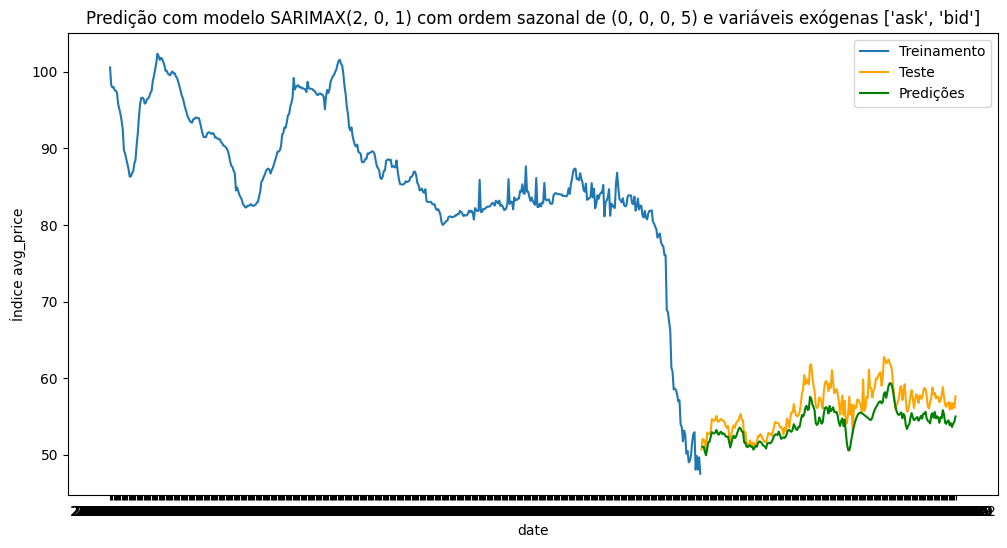

In [54]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['avg_price'].index[:train_size], df['avg_price'][:train_size], label='Treinamento')
plt.plot(df['avg_price'].index[train_size:], df['avg_price'][train_size:], label='Teste', color='orange')
plt.plot(predictions.index, predictions, label='Predições', color='green')
plt.xlabel('date')
plt.ylabel('Índice avg_price')
plt.title(f'Predição com modelo SARIMAX{best_order} com ordem sazonal de {best_seasonal_order} e variáveis exógenas {best_vars}')	
plt.legend()
plt.show()

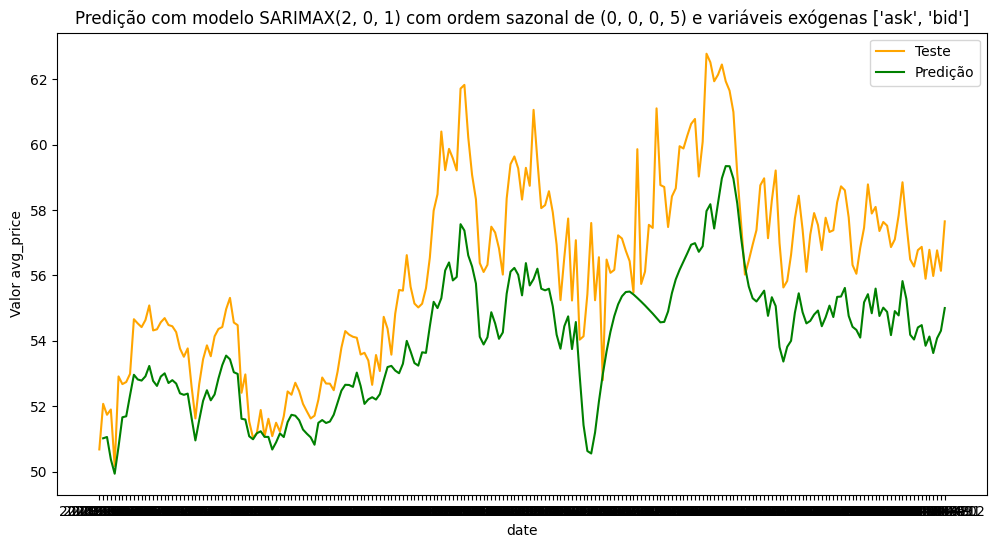

In [55]:
# Somente período de teste
# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['avg_price'].index[train_size:], df['avg_price'][train_size:], label='Teste', color='orange')
plt.plot(predictions.index, predictions, label='Predição', color='green')
plt.xlabel('date')
plt.ylabel('Valor avg_price')
plt.title(f'Predição com modelo SARIMAX{best_order} com ordem sazonal de {best_seasonal_order} e variáveis exógenas {best_vars}')	
plt.legend()
plt.show()

# Recurrent Neural Network (RNN)

## LSTM

LSTM

In [56]:
datos = df[['avg_price', 'ask', 'bid']]
datos.head()

,avg_price,ask,bid
date,,,
2021-05-31,100.582839,100.930014,96.294925
2021-06-01,98.260000,100.930014,96.294925
2021-06-02,97.962223,104.538052,95.055231
2021-06-04,98.019999,103.732872,94.953842
2021-06-07,97.593333,100.561709,95.757563


In [57]:
# Split data
size = int(len(datos)*0.7) # 70% para treinamento e 30% para teste
X_train, X_test = datos.iloc[:size], datos.iloc[size:]

In [58]:
# Datos de entrenamiento
y_train = X_train['avg_price'][1:].values
exog_train = X_train[['ask', "bid"]][1:].values

In [59]:
import datetime

# Garantir que as datas estejam no formato datetime
start_date = datos.iloc[len(X_train)].name
end_date = datos.iloc[-1].name

# Se 'start_date' ou 'end_date' forem strings, convertê-los para datetime primeiro
if isinstance(start_date, str):
    start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d')
if isinstance(end_date, str):
    end_date = datetime.datetime.strptime(end_date, '%Y-%m-%d')

# Formatar para string no formato desejado
start_date = start_date.strftime('%Y-%m-%d')
end_date = end_date.strftime('%Y-%m-%d')

# Extrair os dados para y_test e exog_test
y_test = X_test['avg_price'][start_date:end_date].values
exog_test = X_test[['ask', 'bid']][start_date:end_date].values

In [60]:
from sklearn.preprocessing import MinMaxScaler

# Reshaping dados de treinamento e teste
scaler_y = MinMaxScaler(feature_range=(0, 1))
# obtendo valores escalados
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

In [61]:
scaler_exog = MinMaxScaler(feature_range=(0, 1))
exog_train_scaled = scaler_exog.fit_transform(exog_train)
exog_test_scaled = scaler_exog.transform(exog_test)

In [62]:
# Hashing y_train_scaled e exog_train_scaled
train_data = np.hstack((y_train_scaled, exog_train_scaled))
test_data = np.hstack((y_test_scaled, exog_test_scaled))

In [63]:
# # Sequenciar dados
# def create_sequences(data, seq_length):
#     X = []
#     y = []
#     for i in range(seq_length, len(data)):
#         X.append(data[i-seq_length:i])
#         y.append(data[i, 0])  
#     return np.array(X), np.array(y)

In [64]:
#how many days foward to predict
prediction_days = 1

def create_sequences(scaled_data,prediction_days):
  x_train=[]
  y_train=[]
  print("type of scaled_data",type(scaled_data))
  for x in range(prediction_days, len(scaled_data)):
      x_train.append(scaled_data[x-prediction_days:x, 0])
      y_train.append(scaled_data[x, 0])
  return x_train,y_train

In [65]:
# seq_length = 60
seq_length = 1
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

#reshape x_train
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

type of scaled_data <class 'numpy.ndarray'>
type of scaled_data <class 'numpy.ndarray'>


In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [67]:
#Build the Model 4 LAYERS
def create_model_LSTM(X_train):
    model = Sequential()    
    # model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    print("Type of X_train", type(X_train))
    model.add(LSTM(units=75, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=75, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=75, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=75))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.summary()
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=200, batch_size=32)
    return model, history

model, history = create_model_LSTM(X_train)

Type of X_train <class 'numpy.ndarray'>


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 75)          │        23,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 75)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 75)          │        45,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 75)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 75)          │        45,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 75)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 75)             │        45,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,076 (621.39 KB)

 Trainable params: 159,076 (621.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4941
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3364 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0611 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0239 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0217 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0191 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0153 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0126 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0139 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105 
Epoch 13/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109 
Epoch 14/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079 
Epoch 15/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

In [68]:
history = model 
history

<Sequential name=sequential, built=True>

In [69]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# # Definir el modelo LSTM
# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))

# model.compile(optimizer='adam', loss='mean_squared_error')

# # Entrenar el modelo
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
# history

In [70]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 75)          │        23,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 75)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 75)          │        45,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 75)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 75)          │        45,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 75)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 75)             │        45,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,230 (1.82 MB)

 Trainable params: 159,076 (621.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 318,154 (1.21 MB)

In [71]:
# Predict
predictions_scaled = model.predict(X_test)

# inverter a escala dos valores previstos
predictions = scaler_y.inverse_transform(predictions_scaled)

# desnormalizar y_test
y_test_descaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# DF com resultados previstos e reais
df_results = pd.DataFrame({
    'Real': y_test_descaled.flatten(),
    'Predicted': predictions.flatten()
})

df_results

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


,Real,Predicted
0,51.742005,51.886921
1,51.903535,51.605686
2,50.175300,51.741314
3,52.913832,50.305748
4,52.678852,52.596340
...,...,...
214,56.782795,55.189537
215,55.983425,55.977425
216,56.765685,55.265121
217,56.141202,55.962101


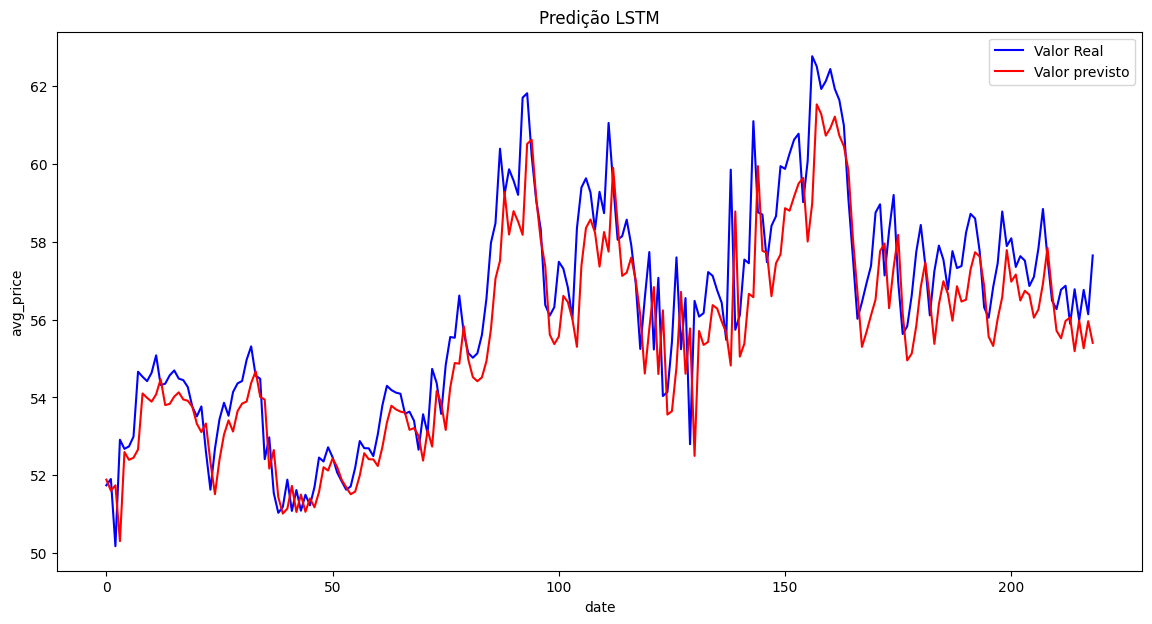

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# REAL
plt.plot(df_results.index, df_results['Real'], label='Valor Real', color='blue')

# PREDICTED
plt.plot(df_results.index, df_results['Predicted'], label='Valor previsto', color='red')

plt.title('Predição LSTM')
plt.xlabel('date')
plt.ylabel('avg_price')

plt.legend()

plt.show()

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_descaled, predictions)
mae = mean_absolute_error(y_test_descaled, predictions)
mape = np.mean(np.abs((y_test_descaled - predictions) / y_test_descaled)) * 100

print(f'Mean Squared error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}') # Mean Absolute Error
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%') # Mean Absolute Percentage Error


Mean Squared error (MSE): 1.768290217197518
Mean Absolute Error (MAE): 1.012198857517927
Mean Absolute Percentage Error (MAPE): 1.77%


In [74]:
# Função para remover a escala dos dados
def descaler(scaled_data, scaler, original_shape):
    scaled_data_reshaped = scaled_data.reshape(-1, 1)
    descaled_data = scaler.inverse_transform(np.concatenate((scaled_data_reshaped, np.zeros((scaled_data_reshaped.shape[0], original_shape - 1))), axis=1))
    return descaled_data[:, 0]

In [75]:
# Predição no conjunto de treinamento
train_predictions = model.predict(X_train)

# Tirar escalas das previsões do conjunto de treinamento
train_predictions_descaled = descaler(train_predictions, scaler_y, len(series))

# tirar escalas dos valores reais do conjunto de treinamento
y_train_descaled = descaler(y_train, scaler_y, len(series))

# Calculo de MSE, MAE e MAPE para o conjunto de treinamento
train_mse = mean_squared_error(y_train_descaled, train_predictions_descaled)
train_mae = mean_absolute_error(y_train_descaled, train_predictions_descaled)
train_mape = np.mean(np.abs((y_train_descaled - train_predictions_descaled) / y_train_descaled)) * 100

print(f'Mean Squared Error (MSE) de treinamento: {train_mse}') # Mean Squared Error
print(f'Mean Absolute Error (MAE) de treinamento: {train_mae}') # Mean Absolute Error
print(f'Mean Absolute Percentage Error (MAPE) de treinamento: {train_mape:.2f}%') # Mean Absolute Percentage Error

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Squared Error (MSE) de treinamento: 1.103793972806608
Mean Absolute Error (MAE) de treinamento: 0.7249216028235468
Mean Absolute Percentage Error (MAPE) de treinamento: 0.90%
